https://colab.research.google.com/drive/1jKzKN_7Fj-OIwTZlVBDaxVj5ct1uGAva

# GAN

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
plt.switch_backend('agg') 

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.datasets import mnist
import numpy as np
from PIL import Image
import argparse
import math

In [0]:
!pip install logger
from logger import logger

  Created wheel for logger: filename=logger-1.4-cp36-none-any.whl size=1790 sha256=2257994ce39b0239e46821e1f8e4c7ca8af164bfba407dc78c8e5f9ce5bc001c
  Stored in directory: /root/.cache/pip/wheels/91/d4/96/08341e2ac92c1ed4b760e4848e1acda3795f0257a83b94b42e
Successfully built logger


In [0]:
shape = (28, 28, 1)
epochs = 400
batch = 32
save_interval = 100

In [0]:
def generator():
    model = Sequential()
    model.add(Dense(256, input_shape=(100,)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape(shape))
    return model

In [0]:
def discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=shape))
    model.add(Dense((28 * 28 * 1), input_shape=shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(int((28 * 28 * 1) / 2)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [0]:
Generator = generator()
Generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))

Discriminator = discriminator()
Discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8),metrics=['accuracy'])


[29/Sep/2019 12:24:04] WARNING - From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.


[29/Sep/2019 12:24:04] WARNING - From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


[29/Sep/2019 12:24:04] WARNING - From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.


[29/Sep/2019 12:24:04] WARNING - From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.


[29/Sep/2019 12:24:04] WARNING - From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Plea

In [0]:
print(Discriminator.summary(), Generator.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 392)               307720    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 392)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 393       
Total params: 923,553
Trainable params: 923,553
Non-trainable params: 0
________________________________________________

In [0]:
Generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)             

In [0]:
def stacked_generator_discriminator(D, G):
    D.trainable = False
    model = Sequential()
    model.add(G)
    model.add(D)
    return model

In [0]:
def plot_images(samples=16, step=0):
    filename = "mnist_%d.png" % step
    noise = np.random.normal(0, 1, (samples, 100))
    images = Generator.predict(noise)
    plt.figure(figsize=(5, 5))

    for i in range(images.shape[0]):
        plt.subplot(4, 4, i + 1)
        image = images[i, :, :, :]
        image = np.reshape(image, [28, 28])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    #plt.close('all')

In [0]:
stacked_generator_discriminator = stacked_generator_discriminator(Discriminator, Generator)
stacked_generator_discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))

In [0]:
stacked_generator_discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 28, 28, 1)         1493520   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 923553    
Total params: 2,417,073
Trainable params: 1,489,936
Non-trainable params: 927,137
_________________________________________________________________


In [0]:
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
save_interval = 250

In [0]:
%matplotlib inline

disc_loss = []
gen_loss = []
for cnt in range(4000):

  random_index = np.random.randint(0, len(X_train) - batch / 2)
  legit_images = X_train[random_index: random_index + batch // 2].reshape(batch // 2, 28, 28, 1)
  gen_noise = np.random.normal(-1, 1, (batch // 2, 100))/2
  syntetic_images = Generator.predict(gen_noise)

  x_combined_batch = np.concatenate((legit_images, syntetic_images))
  y_combined_batch = np.concatenate((np.ones((batch // 2, 1)), np.zeros((batch // 2, 1))))

  d_loss = Discriminator.train_on_batch(x_combined_batch, y_combined_batch)

  noise = np.random.normal(-1, 1, (batch, 100))/2
  y_mislabled = np.ones((batch, 1))

  g_loss = stacked_generator_discriminator.train_on_batch(noise, y_mislabled)

  logger.info('epoch: {}, [Discriminator: {}], [Generator: {}]'.format(cnt, d_loss[0], g_loss))
  disc_loss.append(d_loss[0])
  gen_loss.append(g_loss)

  if cnt % save_interval == 0:
      plot_images(step=cnt)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


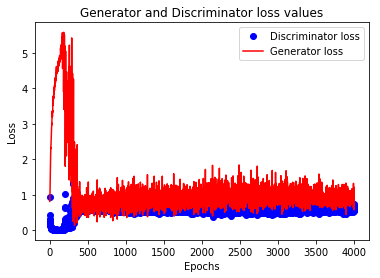

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 4001)
plt.plot(epochs, disc_loss, 'bo', label='Discriminator loss')
plt.plot(epochs, gen_loss, 'r', label='Generator loss')
plt.title('Generator and Discriminator loss values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

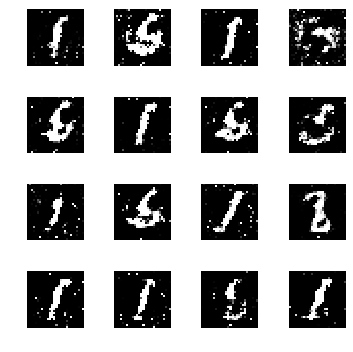

In [0]:
plot_images(step=cnt)

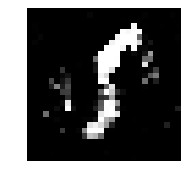

In [0]:
noise = np.random.normal(0, 1, (1, 100))
images = Generator.predict(noise)
plt.figure(figsize=(10, 10))

for i in range(images.shape[0]):
    plt.subplot(4, 4, i + 1)
    image = images[i, :, :, :]
    image = np.reshape(image, [28, 28])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# DCGAN

In [0]:
def generator():
    model = Sequential()
    model.add(Dense(input_dim=100, output_dim=1024))
    model.add(Activation('tanh'))
    model.add(Dense(128*7*7))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Reshape((7, 7, 128), input_shape=(128*7*7,)))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(64, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(1, (5, 5), padding='same'))
    model.add(Activation('tanh'))
    return model


def discriminator():
    model = Sequential()
    model.add(
            Conv2D(64, (5, 5),
            padding='same',
            input_shape=(28, 28, 1))
            )
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (5, 5)))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('tanh'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

In [0]:
Generator = generator()
Generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))

Discriminator = discriminator()
Discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8),metrics=['accuracy'])

def stacked_generator_discriminator(D, G):
    D.trainable = False
    model = Sequential()
    model.add(G)
    model.add(D)
    return model
	
stacked_generator_discriminator = stacked_generator_discriminator(Discriminator, Generator)
stacked_generator_discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5, decay=8e-8))


[29/Sep/2019 12:26:18] WARNING - From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2239: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=1024)`
  This is separate from the ipykernel package so we can avoid doing imports until



[29/Sep/2019 12:26:18] WARNING - From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
%matplotlib inline
disc_loss = []
gen_loss = []
for cnt in range(4000):

  random_index = np.random.randint(0, len(X_train) - batch / 2)
  legit_images = X_train[random_index: random_index + batch // 2].reshape(batch // 2, 28, 28, 1)
  gen_noise = np.random.normal(-1, 1, (batch // 2, 100))/2
  syntetic_images = Generator.predict(gen_noise)

  x_combined_batch = np.concatenate((legit_images, syntetic_images))
  y_combined_batch = np.concatenate((np.ones((batch // 2, 1)), np.zeros((batch // 2, 1))))

  d_loss = Discriminator.train_on_batch(x_combined_batch, y_combined_batch)

  noise = np.random.normal(-1, 1, (batch, 100))/2
  y_mislabled = np.ones((batch, 1))

  g_loss = stacked_generator_discriminator.train_on_batch(noise, y_mislabled)

  logger.info('epoch: {}, [Discriminator: {}], [Generator: {}]'.format(cnt, d_loss[0], g_loss))
  disc_loss.append(d_loss[0])
  gen_loss.append(g_loss)
  if cnt % save_interval == 0:
      plot_images(step=cnt)	

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


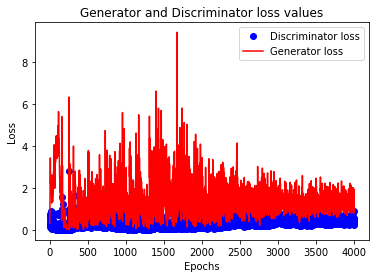

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 4001)
plt.plot(epochs, disc_loss, 'bo', label='Discriminator loss')
plt.plot(epochs, gen_loss, 'r', label='Generator loss')
plt.title('Generator and Discriminator loss values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()